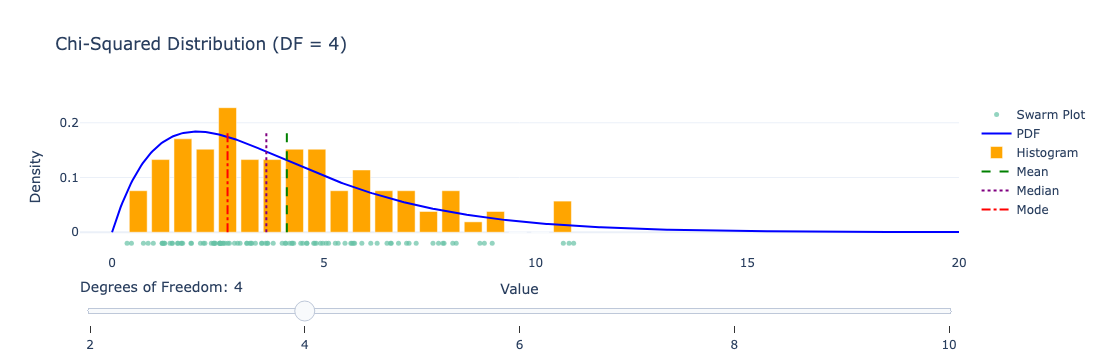

In [11]:
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import chi2
from matplotlib.colors import to_hex

# Function to generate the interactive Chi-Squared plot with DF slider
def generate_interactive_chi_square_with_pdf_and_corrected_mode():
    # Parameters
    initial_df = 4  # Initial degrees of freedom
    dfs = [2, 4, 6, 8, 10]  # Slider options for degrees of freedom
    sample_size = 100  # Fixed sample size
    x = np.linspace(0, 20, 500)  # PDF range

    # Function to generate data
    def generate_data(df):
        y_pdf = chi2.pdf(x, df=df)  # PDF values
        sample = np.random.chisquare(df=df, size=sample_size)  # Sample data
        hist, bins = np.histogram(sample, bins=20, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        mean = np.mean(sample)
        median = np.median(sample)
        mode = bin_centers[np.argmax(hist)]  # Mode from the histogram
        return y_pdf, sample, hist, bin_centers, mean, median, mode

    # Initial data
    y_pdf, sample, hist, bin_centers, mean, median, mode = generate_data(initial_df)

    # Create a swarm plot using Seaborn
    sns_colors = sns.color_palette("Set2", 10)
    swarm_color = to_hex(sns_colors[0])  # Convert Seaborn color to HEX

    # Create figure
    fig = go.Figure()

    # Swarm Plot (Scatter representation of sample points)
    fig.add_trace(go.Scatter(
        x=sample,
        y=np.zeros_like(sample) - 0.02,  # Offset slightly for visibility
        mode='markers',
        marker=dict(color=swarm_color, size=5, opacity=0.7),
        name="Swarm Plot"
    ))

    # Add PDF line
    fig.add_trace(go.Scatter(
        x=x,
        y=y_pdf,
        mode='lines',
        name="PDF",
        line=dict(color='blue')
    ))

    # Add histogram
    fig.add_trace(go.Bar(
        x=bin_centers,
        y=hist,
        name="Histogram",
        marker=dict(color='orange')
    ))

    # Add vertical lines for mean, median, and mode
    fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, max(y_pdf)],
        mode='lines',
        line=dict(color='green', dash='dash'),
        name="Mean"
    ))
    fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, max(y_pdf)],
        mode='lines',
        line=dict(color='purple', dash='dot'),
        name="Median"
    ))
    fig.add_trace(go.Scatter(
        x=[mode, mode],
        y=[0, max(y_pdf)],
        mode='lines',
        line=dict(color='red', dash='dashdot'),
        name="Mode"
    ))

    # Slider steps
    steps = []
    for df in dfs:
        y_pdf, sample, hist, bin_centers, mean, median, mode = generate_data(df)
        steps.append({
            "label": str(df),
            "method": "update",
            "args": [
                {
                    "x": [sample, x, bin_centers, [mean, mean], [median, median], [mode, mode]],
                    "y": [np.zeros_like(sample) - 0.02, y_pdf, hist, [0, max(y_pdf)], [0, max(y_pdf)], [0, max(y_pdf)]]
                },
                {
                    "title": f"Chi-Squared Distribution (DF = {df})"
                }
            ]
        })

    # Add layout with slider
    fig.update_layout(
        title=f"Chi-Squared Distribution (DF = {initial_df})",
        xaxis_title="Value",
        yaxis_title="Density",
        template="plotly_white",
        sliders=[{
            "steps": steps,
            "active": dfs.index(initial_df),
            "currentvalue": {"prefix": "Degrees of Freedom: ", "font": {"size": 14}},
        }],
        showlegend=True,
    )

    # Save as HTML
    fig.write_html("chi_squared_pdf_corrected_mode.html", include_plotlyjs="cdn")

    return fig

# Generate and show the interactive plot
fig = generate_interactive_chi_square_with_pdf_and_corrected_mode()
fig.show()

